# **KHANIF FAUZI PAMBUDI (LIVE CODE 2 PHASE 1)**

# **PROBLEMS**

Menggunakan dataset https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility, buatlah model machine learning untuk mengklasifikasikan kemungkinan orang terkena serangan jantung. Bandingkan antara model Decision Tree dan Random Forest. Mana yang lebih baik untuk data ini?


# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np

# **DATA LOADING**

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# **DATA EXPLORATION**

In [6]:
len(df)

303

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
nmbr_cols = list(df.select_dtypes("number").columns)
nmbr_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
df[nmbr_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df[["target"]].describe().T

,count,mean,std,min,25%,50%,75%,max
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


# **DATA CLEANING**

Mengecek apakah terdapat missing value atau tidak

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

tidak terdapat missing value

Mengecek apakah ada duplicate rows atau tidak

In [14]:
df.duplicated().any()

True

# **EDA**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

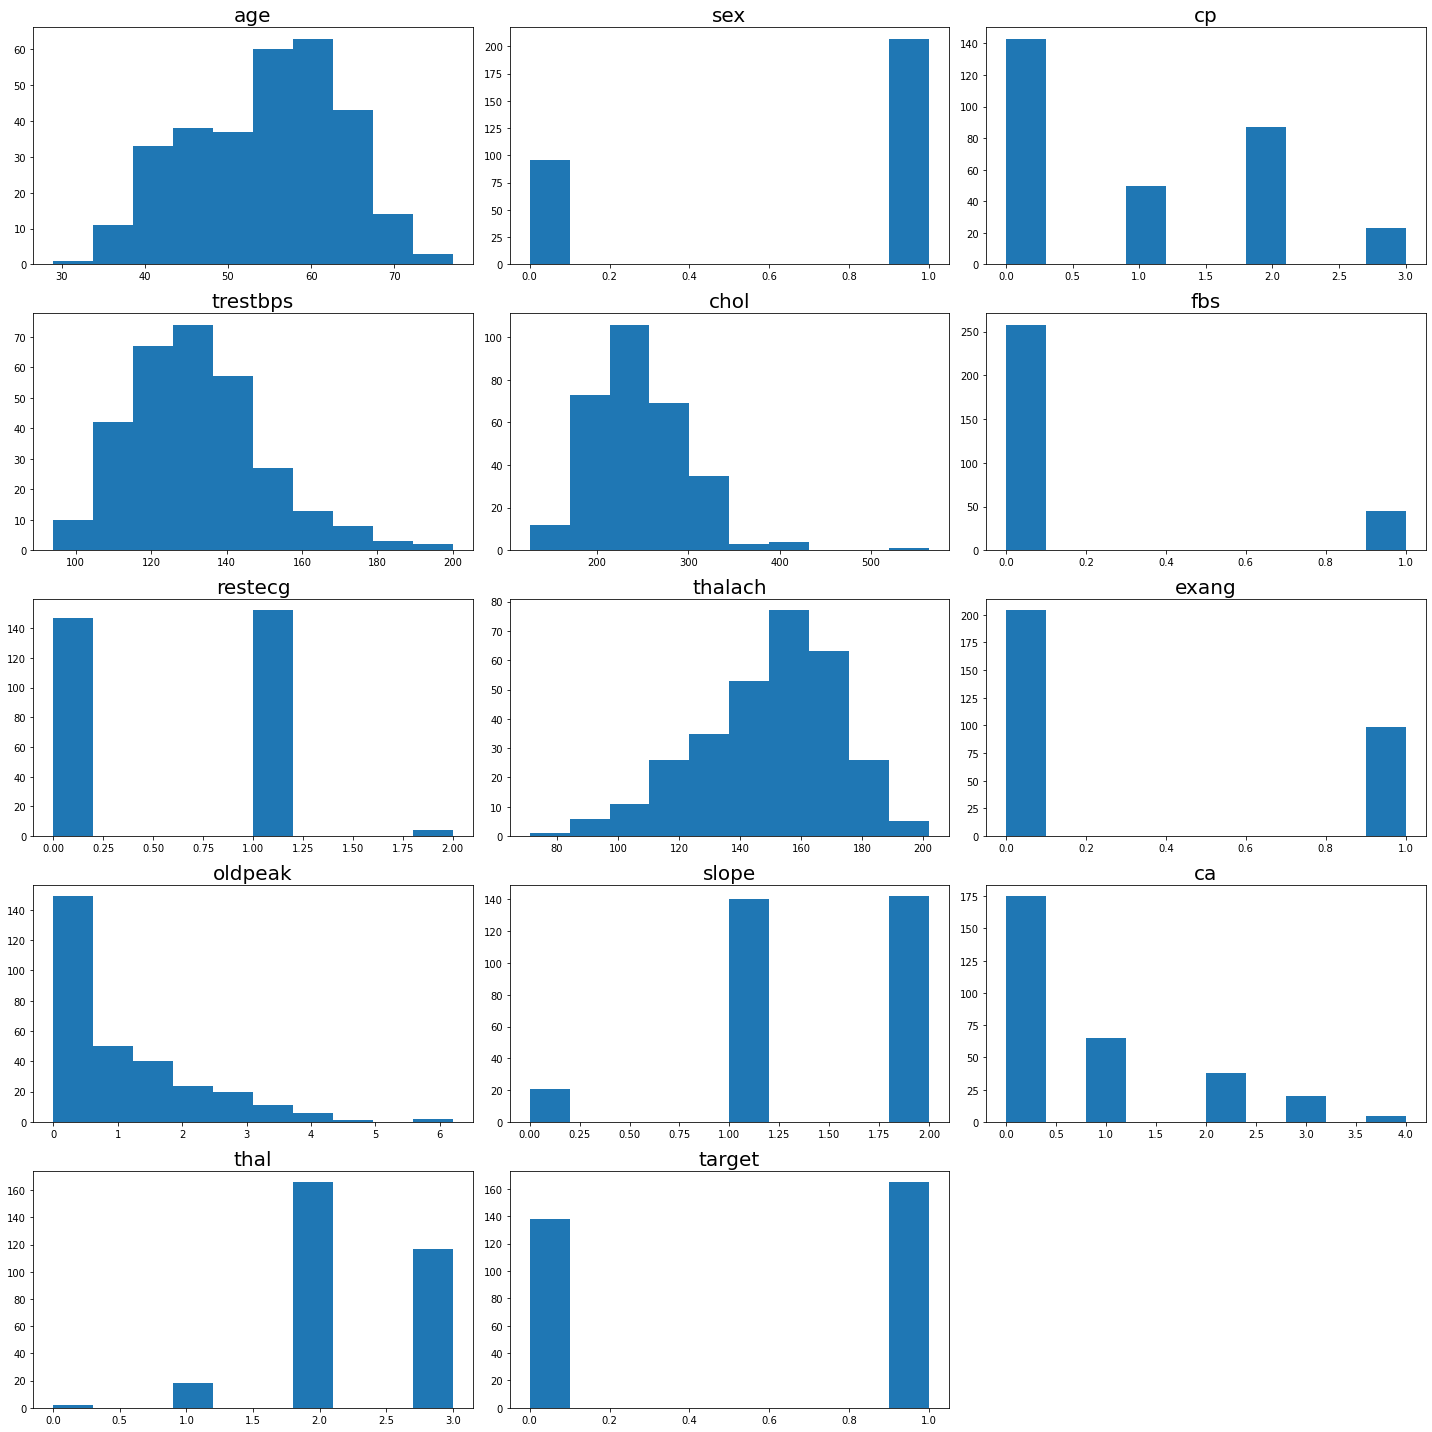

In [18]:
#Melakukan plot untuk feature numerical
plt.figure(figsize = (20, 20))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    plt.hist(df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

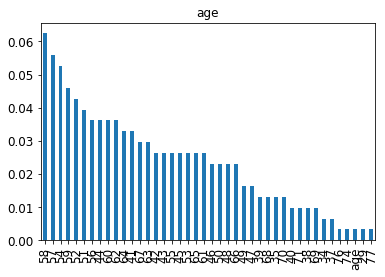

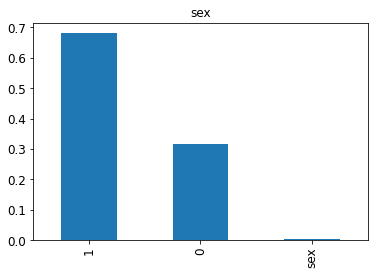

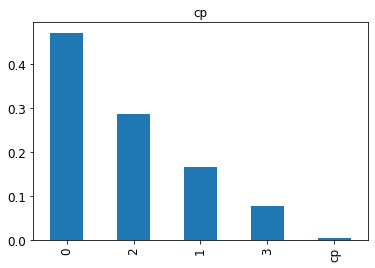

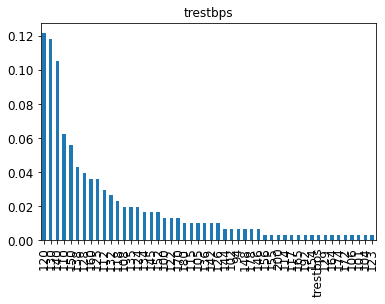

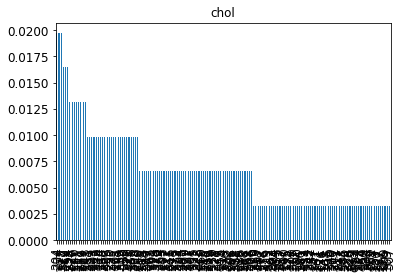

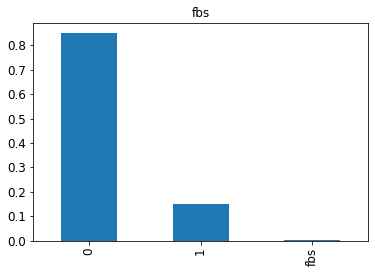

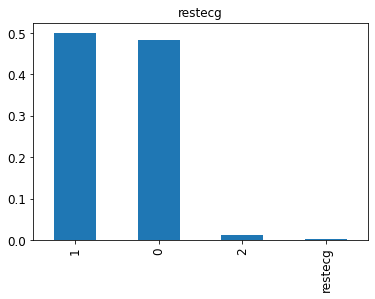

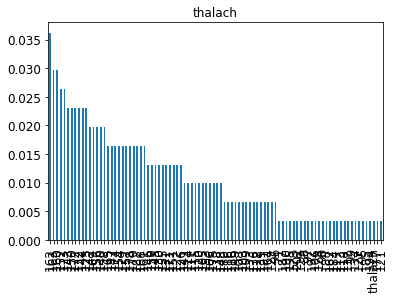

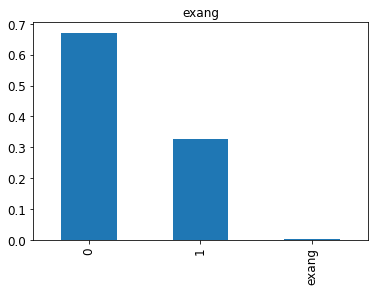

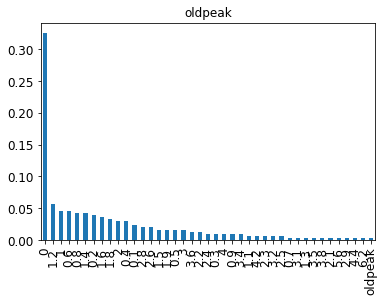

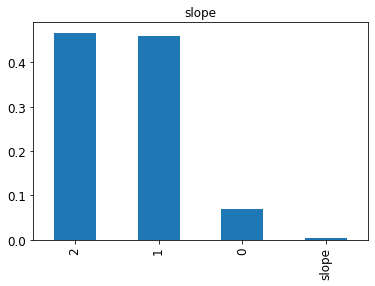

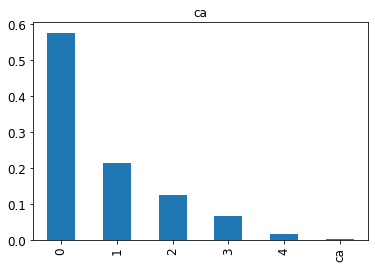

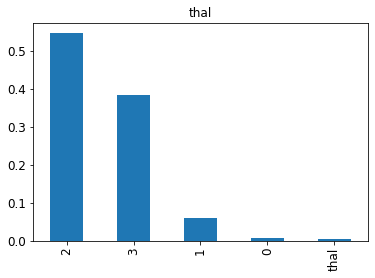

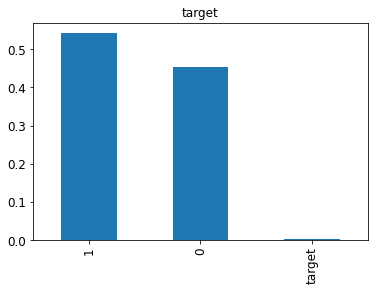

In [85]:
for c in df.select_dtypes(include='object'):
  df[c].value_counts(normalize=True).plot.bar(title=c)
  plt.show()

In [76]:
df['age'].unique()

array(['age', '63', '37', '41', '56', '57', '44', '52', '54', '48', '49',
       '64', '58', '50', '66', '43', '69', '59', '42', '61', '40', '71',
       '51', '65', '53', '46', '45', '39', '47', '62', '34', '35', '29',
       '55', '60', '67', '68', '74', '76', '70', '38', '77'], dtype=object)

dapat dilihat dari grafik normalisasi disimpulkan bahwa semakin tua usia semakin mempengaruhi target yes

In [77]:
df['sex'].unique()

array(['sex', '1', '0'], dtype=object)

dapat dilihat dari grafik normalisasi disimpulkan bahwa laki-laki cenderung memiliki target terkena serangan jantung

In [86]:
df['cp'].unique()

array(['cp', '3', '2', '1', '0'], dtype=object)

dapat dilihat dari grafik normalisasi cp dengan nilai 0 atau typical angina memiliki kecenderungan untuk terkena serangan jantung

In [87]:
df['trestbps'].unique()

array(['trestbps', '145', '130', '120', '140', '172', '150', '110', '135',
       '160', '105', '125', '142', '155', '104', '138', '128', '108',
       '134', '122', '115', '118', '100', '124', '94', '112', '102',
       '152', '101', '132', '148', '178', '129', '180', '136', '126',
       '106', '156', '170', '146', '117', '200', '165', '174', '192',
       '144', '123', '154', '114', '164'], dtype=object)

dapat dilihat dari grafik normalisasi semakin tinggi tekanan darah semakin memiliki kecenderungan untuk terkena serangan jantung

In [88]:
df['chol'].unique()

array(['chol', '233', '250', '204', '236', '354', '192', '294', '263',
       '199', '168', '239', '275', '266', '211', '283', '219', '340',
       '226', '247', '234', '243', '302', '212', '175', '417', '197',
       '198', '177', '273', '213', '304', '232', '269', '360', '308',
       '245', '208', '264', '321', '325', '235', '257', '216', '256',
       '231', '141', '252', '201', '222', '260', '182', '303', '265',
       '309', '186', '203', '183', '220', '209', '258', '227', '261',
       '221', '205', '240', '318', '298', '564', '277', '214', '248',
       '255', '207', '223', '288', '160', '394', '315', '246', '244',
       '270', '195', '196', '254', '126', '313', '262', '215', '193',
       '271', '268', '267', '210', '295', '306', '178', '242', '180',
       '228', '149', '278', '253', '342', '157', '286', '229', '284',
       '224', '206', '167', '230', '335', '276', '353', '225', '330',
       '290', '172', '305', '188', '282', '185', '326', '274', '164',
       '307', '249'

dapat dilihat dari grafik normalisasi semakin tinggi angka cholesterol semakin memiliki kecenderungan untuk terkena serangan jantung

In [90]:
df['fbs'].unique()

array(['fbs', '1', '0'], dtype=object)

dapat dilihat dari grafik normalisasi jika memiliki fasting blod sugar yang rendah (0 = false) maka akan semakin memiliki kecenderungan untuk memiliki penyakit jantung

In [91]:
df['restecg'].unique()

array(['restecg', '0', '1', '2'], dtype=object)

dapat dilihat dari grafik normalisasi nilai restecg 0 dan 1 tidak terlalu terlihat dalam mempengaruhi hasil target karena memiliki nilai kemungkinan yang cukup tinggi untuk keduanya

In [92]:
df['thalach'].unique()

array(['thalach', '150', '187', '172', '178', '163', '148', '153', '173',
       '162', '174', '160', '139', '171', '144', '158', '114', '151',
       '161', '179', '137', '157', '123', '152', '168', '140', '188',
       '125', '170', '165', '142', '180', '143', '182', '156', '115',
       '149', '146', '175', '186', '185', '159', '130', '190', '132',
       '147', '154', '202', '166', '164', '184', '122', '169', '138',
       '111', '145', '194', '131', '133', '155', '167', '192', '121',
       '96', '126', '105', '181', '116', '108', '129', '120', '112',
       '128', '109', '113', '99', '177', '141', '136', '97', '127', '103',
       '124', '88', '195', '106', '95', '117', '71', '118', '134', '90'],
      dtype=object)

dapat dilihat dari grafik normalisasi jika nilai maksimum detak jantung atau thalach menghasilkan angka tinggi maka memiliki kecenderungan untuk terkena serangan jantung

In [93]:
df['exang'].unique()

array(['exang', '0', '1'], dtype=object)

dapat dilihat dari grafik normalisasi jika tidak pernah melakukan exang atau excercise angina (yang bernilai 0) maka memiliki kecenderungan untuk terkena serangan jantung dibandingkan dengan yang melakukan excercise angina (yang bernilai 1)

In [94]:
df['oldpeak'].unique()

array(['oldpeak', '2.3', '3.5', '1.4', '0.8', '0.6', '0.4', '1.3', '0',
       '0.5', '1.6', '1.2', '0.2', '1.8', '1', '2.6', '1.5', '3', '2.4',
       '0.1', '1.9', '4.2', '1.1', '2', '0.7', '0.3', '0.9', '3.6', '3.1',
       '3.2', '2.5', '2.2', '2.8', '3.4', '6.2', '4', '5.6', '2.9', '2.1',
       '3.8', '4.4'], dtype=object)

dapat dilihat dari grafik normalisasi, semakin rendah oldpeak atau waktu induksi istirahat maka akan semakin rentan terkena serangan jantung

In [95]:
df['slope'].unique()

array(['slope', '0', '2', '1'], dtype=object)

dapat dilihat dari grafik normalisasi semakin miring slope dengan tingkay kemiringa tertinggi dengan value 2 maka akan semakin mempengaruhi hasil untuk terkena serangan jantung

In [97]:
df['ca'].unique()

array(['ca', '0', '2', '1', '3', '4'], dtype=object)

dapat dilihat dari grafik normalisasi semakin sedikit jumlah pembuluh utama semakin cenderung mengalami penyakit jantung

In [98]:
df['thal'].unique()

array(['thal', '1', '2', '3', '0'], dtype=object)

dapat dilihat dari grafik normalisasi jika thal memiliki pengaruh defect maka akan semakin cenderung mengalami penyakit jantung

# **EDA ANALYSIS**

Semua fitur pada dataset mempengaruhi hasil klasifikasi karena dari grafik yang dapat dilihat bahwa semua fitur memiliki kecenderungan dalam menghasilkan target karena terdapat value pada fitur-fitur tersebut yang menunjukan dominasi untuk dapat memprediksi target yang diinginkan

# **TARGET DATA**

In [19]:
df.groupby(["target"]).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


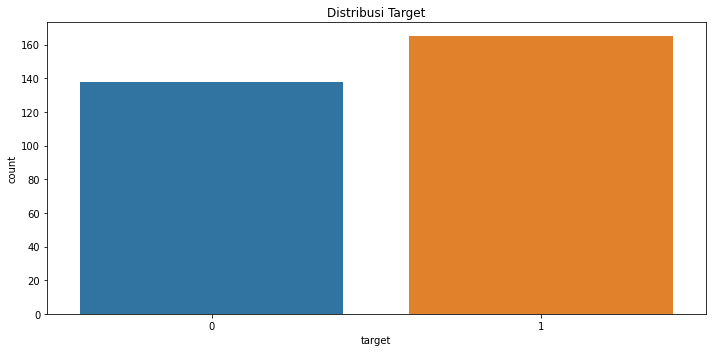

In [20]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["target"],
)
plt.title("Distribusi Target")
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

In [21]:
new_df = df.copy()

In [22]:
new_df['target'] = new_df['target'].map({0:'No', 1:'Yes'})

# **DECISION TREE**

# **SPLIT DATA**

In [26]:
voting_data = df.copy()

In [27]:
X = voting_data.drop(['target'], axis=1)

y = voting_data['target']

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [31]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [32]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [33]:
y_pred_train = tree_clf.predict(X_train)
y_pred = tree_clf.predict(X_test)

# **TRAIN**

In [41]:
y_pred_train = tree_clf.predict(X_train)
y_pred_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

# **TEST**

In [43]:
y_pred = tree_clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# **MODEL TRAIN**

In [34]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_train,y_pred_train))
print('MAE:', mean_absolute_error(y_train,y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.14049586776859505
MAE: 0.14049586776859505
RMSE: 0.37482778414706003
r2: 0.605603448275862


# **MODEL TEST**

In [35]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.09836065573770492
MAE: 0.09836065573770492
RMSE: 0.31362502409359
r2: 0.605603448275862


# **MODEL SCORES (EVALUATION)**

In [36]:
print('Training set score: {:.4f}'.format(tree_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree_clf.score(X_test, y_test)))

Training set score: 0.8595
Test set score: 0.9016


# **TREE VISUALIZATION**

In [37]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(54)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [38]:
df.columns[1:]

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
y_train

18     1
213    0
69     1
123    1
246    0
      ..
17     1
225    0
23     1
271    0
111    1
Name: target, Length: 242, dtype: int64

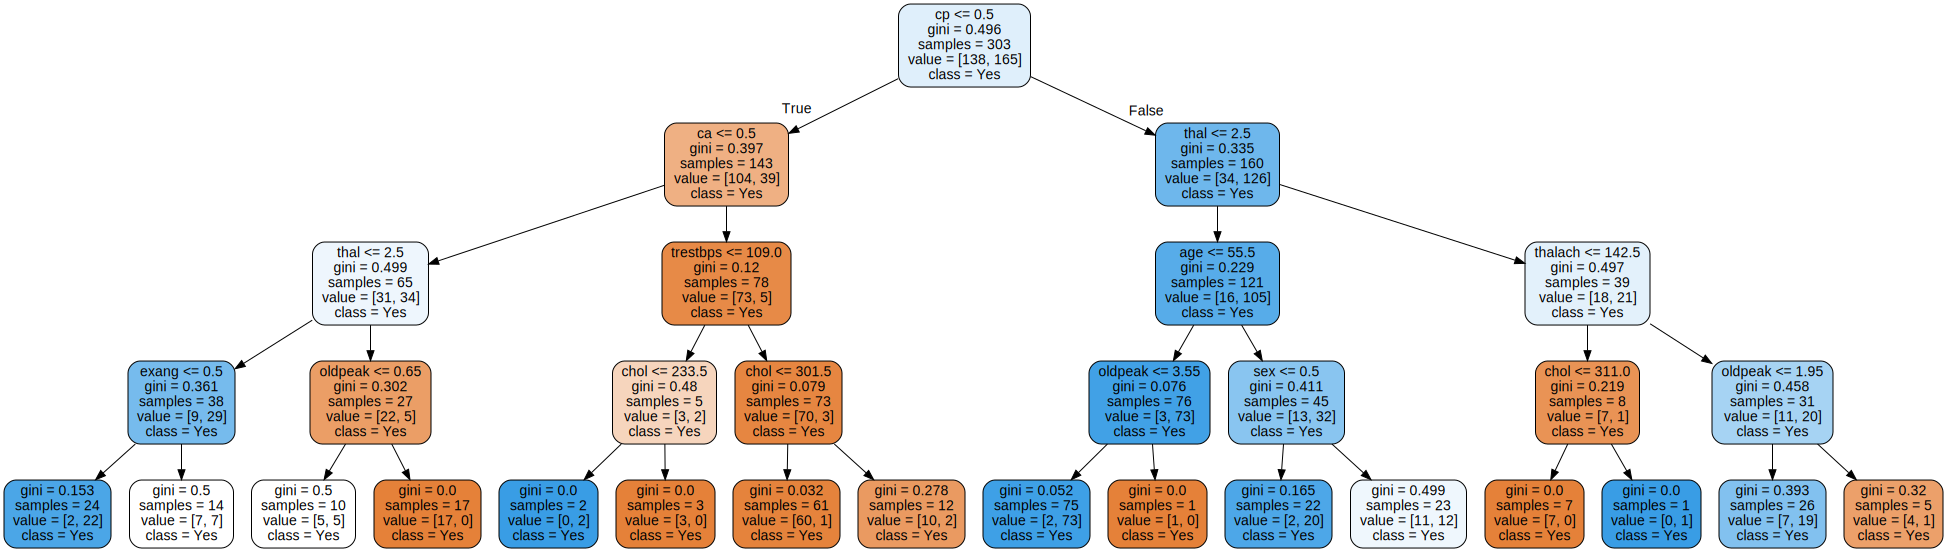

In [40]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "target.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=new_df.target,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "target.dot"))

# **MODEL TUNING (HYPERPARAMETER)**

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# **GRID SEARCH**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

 
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   16.7s


Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872549    0.857143  0.863636    0.864846      0.864082
recall       0.816514    0.902256  0.863636    0.859385      0.863636
f1-score     0.843602    0.879121  0.863636    0.861361      0.863123
support    109.000000  133.000000  0.863636  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 89  20]
 [ 13 120]]

Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.756757  0.786885   0.795045      0.793162
recall      0.689655   0.875000  0.786885   0.782328      0.786885
f1-score    0.7547

[Parallel(n_jobs=-1)]: Done 12978 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:   38.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   38.2s finished


# **RANDOM FOREST**

# **SETUP**

In [47]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **BAGGING**

In [49]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [51]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=300, random_state=54)

In [52]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# **CLASSIFIER**

In [53]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [54]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

1.0

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [56]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

# **OUT OF BAG EVALUATION**

In [64]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7933884297520661

In [65]:
bag_clf.oob_decision_function_

array([[0.04615385, 0.95384615],
       [0.71351351, 0.28648649],
       [0.05789474, 0.94210526],
       [0.34782609, 0.65217391],
       [0.85561497, 0.14438503],
       [0.98203593, 0.01796407],
       [0.2748538 , 0.7251462 ],
       [0.73737374, 0.26262626],
       [0.71505376, 0.28494624],
       [0.95454545, 0.04545455],
       [0.52459016, 0.47540984],
       [0.48756219, 0.51243781],
       [0.05555556, 0.94444444],
       [0.10227273, 0.89772727],
       [0.83695652, 0.16304348],
       [0.63276836, 0.36723164],
       [0.21925134, 0.78074866],
       [0.05235602, 0.94764398],
       [0.81547619, 0.18452381],
       [0.70718232, 0.29281768],
       [0.02531646, 0.97468354],
       [0.23267327, 0.76732673],
       [0.28723404, 0.71276596],
       [0.92227979, 0.07772021],
       [0.90909091, 0.09090909],
       [0.95833333, 0.04166667],
       [0.71084337, 0.28915663],
       [0.74626866, 0.25373134],
       [0.65957447, 0.34042553],
       [0.89130435, 0.10869565],
       [0.

# **MODEL SCORES (EVALUATION)**

In [82]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8524590163934426

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.833333  0.868852   0.876667      0.874536
recall      0.793103   0.937500  0.868852   0.865302      0.868852
f1-score    0.851852   0.882353  0.868852   0.867102      0.867852
support    29.000000  32.000000  0.868852  61.000000     61.000000
_______________________________________________
Confusion Matr

# **MODEL TUNING (HYPERPARAMETER)**

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


Best paramters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})
Train Result:
Accuracy Score: 91.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932039    0.906475  0.917355    0.919257      0.917989
recall       0.880734    0.947368  0.917355    0.914051      0.917355
f1-score     0.905660    0.926471  0.917355    0.916065      0.917097
support    109.000000  133.000000  0.917355  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 96  13]
 [  7 126]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.956522   0.815789  0.868852   0.886156      0.882695
recall      0.758621   0.968750  0.868852   0.863685      0.868

# **GRID SEARCH**

In [70]:
n_estimators = [100, 300]
max_features = ['auto', 'sqrt']
max_depth = [3, 5]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.6min finished


Best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.905263    0.843537  0.867769    0.874400      0.871340
recall       0.788991    0.932331  0.867769    0.860661      0.867769
f1-score     0.843137    0.885714  0.867769    0.864426      0.866537
support    109.000000  133.000000  0.867769  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 86  23]
 [  9 124]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.954545   0.794872  0.852459   0.874709      0.870782
recall      0.724138   0.968750  0.852459   0.846444      0.8524

# **MODEL ANALYSIS**

Setelah dilakukan training data dan testing data pada model decision tree dan random forest dapat disimpulkan bahwa

*   Model Decision Tree menghasilkan akurasi score training sebesar 0.8595 dan akurasi score testing sebesar 0.9016
*   Pada hasil tuning hyperparameter model decision tree dihasilkan akurasi score training sebesar 86.36% dan akurasi score testing sebesar 78.69%

*   Hasil akurasi score testing pada model decision tree dan model tuning decision tree mengalami penurunan karena kedalaman pohon mempengaruhi hasil testing. Ketika hasil testing sudah didapatkan hasil yang terbaik tetapi hasil terbaik tersebut belum mencapai maksimal depth maka pada model tuning akan mengambil hasil akhir pada maksimal depth sehingga akurasi dapat berubah atau menurun
*   Model Random Forest menghasilkan akurasi score training sebesar 100% dan akurasi score testing sebesar 86.89%

*   Hasil yang didapat pada model tuning hyperparameter model random forest pada akurasi score training sebesar 91.74% dan akurasi score testing sebesar 86.89%
*   Kesimpulan yang dapat diambil adalah proses model tuning hyperparameter tidak menjadikan model lebih baik pada model klasifikasi dalam bentuk voting sepertt decision tree dan random forest karena model tersebut bergantung pada kedalaman pohon dan jumlah pohon untuk melakukan klasifikasi





